In [1]:
import numpy as np
import swyft
import pylab as plt
from scipy import stats

In [2]:
def model(v):
    a, c = v
    x = np.linspace(0, 1, 10)
    y = a*x + c
    return dict(y=y)

sim = swyft.Simulator(model, ['a', 'c'], dict(y=(10,)))

In [3]:
store = swyft.MemoryStore(sim)

Creating new store.


In [4]:
prior = swyft.Prior(lambda u: u*2 - 1, 2)  # Uniform prior on [-1, 1]

In [5]:
def noise(sim, v, sigma = 1/10**0.5):
    yn = sim['y'] + np.random.randn(10)*sigma
    return dict(yn = yn)

In [6]:
store.add(3000, prior)
store.simulate()

Store: Adding 2987 new samples to simulator store.


In [7]:
dataset = swyft.Dataset(3000, prior, store, simhook = noise)

In [8]:
post = swyft.Posteriors(dataset)

In [9]:
marg = [(0,), (1,)]
post.add(marg, device = 'cuda')
post.train(marg, scheduler_args = dict(patience = 2, factor = 0.1), max_epochs = 1)

Training: lr=0.001, Epoch=1, VL=1.872


In [ ]:
masses = post.empirical_mass(nobs = 1000, npost = 1000)
# npost --> Nominal mass estimate
# nobs --> Empirical mass estimate

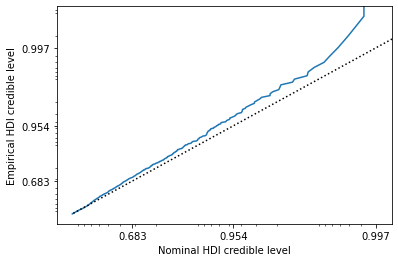

In [115]:
swyft.plot_empirical_mass(masses)

In [15]:
samples = post.sample(1000000, obs0)
fig, axes = swyft.plot1d(samples, [0, 1], truth = v0, bins = 100)
z = np.linspace(-1, 1, 100)
p = stats.norm.pdf(z, 0.0, 0.1)
axes[1].plot(z, p)

NameError: name 'obs0' is not defined

In [13]:
swyft.utils.sample_diagnostics(samples)

{(0,): {'norm': 0.6312990560267321, 'entropy': -0.7754516988456573},
 (1,): {'norm': 0.15990230789998644, 'entropy': -1.4626307532400873}}